<a href="https://colab.research.google.com/github/viking316/ML/blob/main/HandwrittenNumberClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import cv2 
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import  train_test_split

ds = tf.keras.datasets.mnist

# (X_train,Y_train),(X_test,Y_test) = ds.load_data()

# X_train = tf.keras.utils.normalize(X_train, axis =1)
# X_test = tf.keras.utils.normalize(X_test, axis =1)


(x_train, y_train), (x_test, y_test) = ds.load_data()
x = np.concatenate((x_train, x_test))
y = np.concatenate((y_train, y_test))

train_size = 0.6
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=train_size)

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape = (28,28)))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(128, activation = 'relu'))
model.add(tf.keras.layers.Dense(10,activation = "softmax"))

model.compile(optimizer = "adam", loss = "sparse_categorical_crossentropy", metrics = ["accuracy"])
model.fit(x_train,y_train, epochs = 8)

model.save("fingermodel")


Epoch 1/8
1313/1313 [==============================] - 5s 4ms/step - loss: 1.9940 - accuracy: 0.8614
Epoch 2/8
1313/1313 [==============================] - 5s 3ms/step - loss: 0.4724 - accuracy: 0.9140
Epoch 3/8
1313/1313 [==============================] - 4s 3ms/step - loss: 0.3187 - accuracy: 0.9315
Epoch 4/8
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2596 - accuracy: 0.9402
Epoch 5/8
1313/1313 [==============================] - 5s 4ms/step - loss: 0.2095 - accuracy: 0.9495
Epoch 6/8
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1459 - accuracy: 0.9603
Epoch 7/8
1313/1313 [==============================] - 5s 4ms/step - loss: 0.1365 - accuracy: 0.9622
Epoch 8/8
1313/1313 [==============================] - 4s 3ms/step - loss: 0.1246 - accuracy: 0.9655


## *Loading the saved model and then predicting on the custom inputs*

1/1 [==============================] - 0s 52ms/step
the num is:  2


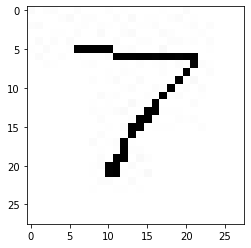

1/1 [==============================] - 0s 17ms/step
the num is:  2


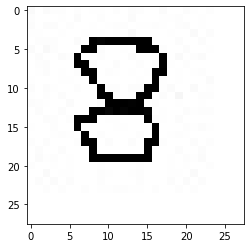

1/1 [==============================] - 0s 17ms/step
the num is:  7


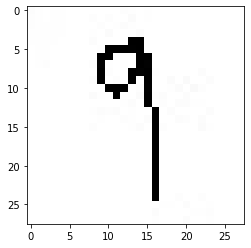

1/1 [==============================] - 0s 16ms/step
the num is:  3


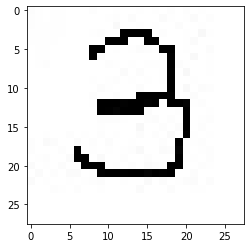

1/1 [==============================] - 0s 16ms/step
the num is:  8


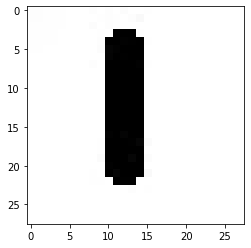

1/1 [==============================] - 0s 17ms/step
the num is:  2


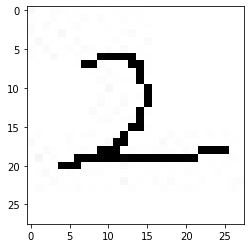

1/1 [==============================] - 0s 17ms/step
the num is:  4


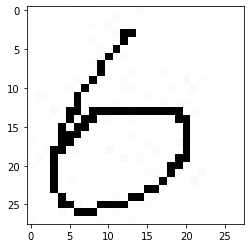

1/1 [==============================] - 0s 16ms/step
the num is:  4


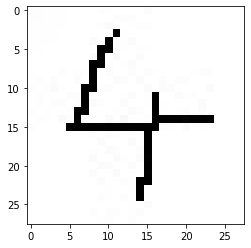

1/1 [==============================] - 0s 17ms/step
the num is:  4


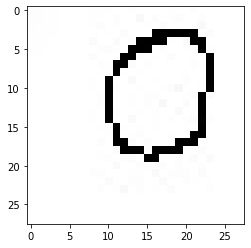

1/1 [==============================] - 0s 25ms/step
the num is:  5


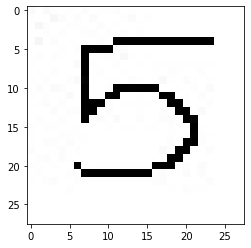

In [ ]:


model = tf.keras.models.load_model("fingermodel")

# loss , accuracy = model.evaluate(X_test,Y_test)

# print("loss: ",loss,"accu: ", accuracy)


# ITERATING INPUT

index = 0

while os.path.isfile(f"/content/Untitled{index}.jpg"):
  try:
    img = cv2.imread(f"/content/Untitled{index}.jpg")[:,:,0]
    img = np.invert(np.array([img]))

    pred = model.predict(img)
    # print(f"the number is: {index}\n prediced o/p:  {np.argmax(pred)}")
    print(f"the num is:  {np.argmax(pred)}")
    plt.imshow(img[0], cmap = plt.cm.binary)
    plt.show()
    
  except Exception:
    print(Exception)
  finally:
    index += 1